# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откройте файлы и изучите их

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import math
from decimal import Decimal
import warnings
warnings.filterwarnings("ignore")
from pandas.core.reshape.merge import merge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')

In [3]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [6]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


- При первом осмотре видим, что в тестовой выборке отсуствуют фичи. в тестовой 53, в остальных по 87. Так же данные в признаках распределены неравномерно и с беспорядком.

### Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [10]:
# Создаем выборку из показателей для расчета эффективности обогащения
data_train = train_df[['rougher.output.concentrate_au','rougher.output.recovery', 'rougher.output.tail_au',  'rougher.input.feed_au']]

In [11]:
data_train.head(5)

,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_au,rougher.input.feed_au
0,19.793808,87.107763,1.170244,6.486150
1,20.050975,86.843261,1.184827,6.478583
2,19.737170,86.842308,1.162562,6.362222
3,19.320810,87.226430,1.079755,6.118189
4,19.216101,86.688794,1.012642,5.663707


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.concentrate_au  14149 non-null  float64
 1   rougher.output.recovery        14149 non-null  float64
 2   rougher.output.tail_au         14149 non-null  float64
 3   rougher.input.feed_au          14149 non-null  float64
dtypes: float64(4)
memory usage: 442.3 KB


In [13]:
data_train = data_train.loc[data_train['rougher.output.recovery'].isna() != True].dropna()

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.concentrate_au  14149 non-null  float64
 1   rougher.output.recovery        14149 non-null  float64
 2   rougher.output.tail_au         14149 non-null  float64
 3   rougher.input.feed_au          14149 non-null  float64
dtypes: float64(4)
memory usage: 552.7 KB


In [15]:
# Функция рассчитывающая эффективность обогащения
def recovery(row):
    # c - доля золота в концентрате после флотации/очистки;
    c = row[ 'rougher.output.concentrate_au']
    # F — доля золота в сырье/концентрате до флотации/очистки;
    f = row['rougher.input.feed_au']
    # T — доля золота в отвальных хвостах после флотации/очистки
    t = row['rougher.output.tail_au']
    recovery = (c * (f - t) )/( f * (c - t))
    return recovery * 100

In [16]:
# Добавляем в выборку столбец с рассчитанной по формуле эффективностью обогащения
data_train['formula_recovery'] = data_train.apply(recovery, axis=1)

In [17]:
data_train.head()

,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_au,rougher.input.feed_au,formula_recovery
0,19.793808,87.107763,1.170244,6.486150,87.107763
1,20.050975,86.843261,1.184827,6.478583,86.843261
2,19.737170,86.842308,1.162562,6.362222,86.842308
3,19.320810,87.226430,1.079755,6.118189,87.226430
4,19.216101,86.688794,1.012642,5.663707,86.688794


In [18]:
# Считаем МАЕ между полученной эффективностью обогащения и данными из таблицы
mean_absolute_error(data_train['rougher.output.recovery'], data_train['formula_recovery'])

9.73512347450521e-15

###### Вывод
- Мы вычислили Эффективность обогащения, рассчитанную по формуле: recovery = (c * (f - t) )/( f * (c - t))
- Низкое стандартное отклонение указывает на то, что значения имеют тенденцию быть близкими к среднему значению. Можно считать, что наша эффективность рассчитано правильно

### Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [19]:
# Получаем список колонок недоступных в тестовой выборке
for column in train_df.columns:
    if column not in test_df.columns:
        print(column)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

###### Вывод

###### В тестовой выборке недоступны данные на этапах:
###### Флотация:
- Расчетные характеристики;
- Концентрация серебра, свинца, золы, золота в сырье после флотации.
- Концентрация серебра, свинца, золы, золота в отвальных хвостах после флотации.
###### Первый этап чистки:
- Концентрация серебра, свинца, золы, золота в сырье после первого этапа чистки.
- Концентрация серебра, свинца, золы, золота в отвальных хвостах после первого этапа чистки.
###### Второй этап чистки:
- Концентрация серебра, свинца, золы, золота в отвальных хвостах после второго этапа чистки.
###### Финальный концентрат:
- Концентрация серебра, свинца, золы, золота в отвальных хвостах на финальной стадии.
- Концентрация серебра, свинца, золы, золота в финальном концентрате.
- Эффективность обогащения сырья.

### Проведите предобработку данных.

In [20]:
# Список целевых признаков
targets = ['rougher.output.recovery', 'final.output.recovery']

In [21]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [22]:
test_df_1 = test_df.merge(full_df[['final.output.recovery', 'rougher.output.recovery', 'date']], on='date', how='left')

In [23]:
print('Было:',test_df.shape,'\nСтало',test_df_1.shape)

Было: (5290, 53) 
Стало (5290, 55)


In [24]:
test_df_1 

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042


In [25]:
df1 = train_df.agg(['min','max'])
df2 = test_df_1.agg(['min','max'])
df3 = full_df.agg(['min','max'])

In [26]:
df1

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
min,2016-01-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
max,2018-08-18 10:59:59,16.001945,17.031899,18.124851,52.756638,100.0,19.552149,5.639565,22.31773,8.197408,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [27]:
df2

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
min,2016-09-01 00:59:59,2.566156,0.003839,5.65,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,...,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,0.0,0.000000
max,2017-12-31 23:59:59,265.983123,40.000000,15.50,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,...,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487,100.0,99.169699


In [28]:
df3

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
min,2016-01-15 00:00:00,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
max,2018-08-18 10:59:59,16.001945,17.031899,19.61572,52.756638,100.0,19.552149,5.804178,22.31773,8.245022,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [29]:
train_df.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64

In [30]:
test_df_1.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.state.floatbank2_a_level     0
rougher.state.floatbank10_f_level              0
secondary_cleaner.state.floatbank2_b_level     0
date                                           0
rougher.state.floatbank10_e_level              0
secondary_cleaner.st

In [31]:
full_df.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64

In [32]:
for array in [test_df_1, full_df, train_df]:
    print(array[targets].isna().sum())

rougher.output.recovery    0
final.output.recovery      0
dtype: int64
rougher.output.recovery    0
final.output.recovery      0
dtype: int64
rougher.output.recovery    0
final.output.recovery      0
dtype: int64


In [33]:
# Убираем из обучающей выборки столбцы, отсутствующие в тестовой выборке
train_df = train_df[test_df_1.columns]
train_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216,87.107763
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198,86.843261
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445,86.842308
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543,87.226430
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016,86.688794


In [34]:
# Заполняем пропущенные значения у нецелевых признаков. 
test_df_1 = test_df_1.dropna()
test_df_1.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [35]:
train_df = train_df.dropna()
train_df.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [36]:
full_df = full_df.dropna()
full_df.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [37]:
train_df.isna().sum().sort_values(ascending=False)

date                                          0
secondary_cleaner.state.floatbank3_b_air      0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
secondary_cleaner.state.floatbank3_b_level    0
rougher.state.floatbank10_c_level             0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air      0
secondary_cleaner.state.floatbank5_a_lev

In [38]:
test_df_1.isna().sum().sort_values(ascending=False)

date                                          0
secondary_cleaner.state.floatbank3_b_air      0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
secondary_cleaner.state.floatbank3_b_level    0
rougher.state.floatbank10_c_level             0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air      0
secondary_cleaner.state.floatbank5_a_lev

In [39]:
full_df.isna().sum().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

###### Вывод

- Была проведена формула вычисления эффективности обогащения.
- Было проанализированы признаки, недоступные в тестовой выборке
- Была провели предобработку данных:
- В тестовую выборку я добавил столбцы с целевыми признаками;
- В обучающей выборке я удалил столбцы, которых не было в тестовой выборке;
- Во всех трех наборах данных мы заполнили пропущенные значения у нецелевых признаков с помощью метода "ffill", так как присутствует сортировка по времени

## Анализ данных

### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [40]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [41]:
period = ['rougher.input.feed_ag', 
           'rougher.input.feed_pb', 
           'rougher.input.feed_au', 
           'rougher.output.concentrate_ag', 
           'rougher.output.concentrate_pb', 
           'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_pb', 
           'primary_cleaner.output.concentrate_au', 
           'final.output.concentrate_ag', 
           'final.output.concentrate_pb', 
           'final.output.concentrate_au'
         ]

In [42]:
metals = full_df[period]

In [43]:
metals.shape

(16094, 12)

In [44]:
metals.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
0,6.100378,2.284912,6.486150,11.500771,7.101074,19.793808,8.547551,10.389648,34.174427,6.055403,9.889648,42.192020
1,6.161113,2.266033,6.478583,11.615865,7.278807,20.050975,8.558743,10.497069,34.118526,6.029369,9.968944,42.701629
2,6.116455,2.159622,6.362222,11.695753,7.216833,19.737170,8.603505,10.354494,33.969464,6.055926,10.213995,42.657501
3,6.043309,2.037807,6.118189,11.915047,7.175616,19.320810,7.221879,8.496563,28.260743,6.047977,9.977019,42.689819
4,6.060915,1.786875,5.663707,12.411054,7.240205,19.216101,9.089428,9.986786,33.044932,6.148599,10.142511,42.774141


In [45]:
# Напишем функцию для подсчета на каждом этапе золота, серебра и свинца
def concentrations(data, metal):
    if metal == 'ag':
        t_metal = 'серебра'
    elif metal == 'pb':
        t_metal = 'свинца'
    elif metal == 'au':
        t_metal = 'золота'
    print(f'Средняя концентрация {t_metal}:')
    print(f'\tисходного сырья = {data[f"rougher.input.feed_{metal}"].mean()}')
    print(f'\tпосле флотации = {data[f"rougher.output.concentrate_{metal}"].mean()}')
    print(f'\tпосле первичного этапа очистки = {data[f"primary_cleaner.output.concentrate_{metal}"].mean()}')
    print(f'\tв финальном концентрате = {data[f"final.output.concentrate_{metal}"].mean()}')

In [46]:
for metal in ('ag', 'pb', 'au'):
    concentrations(metals, metal)

Средняя концентрация серебра:
	исходного сырья = 8.985280730057909
	после флотации = 12.084944858379451
	после первичного этапа очистки = 8.674852987693988
	в финальном концентрате = 5.190975683404247
Средняя концентрация свинца:
	исходного сырья = 3.6366213175766076
	после флотации = 7.553095191381346
	после первичного этапа очистки = 9.884018203488715
	в финальном концентрате = 9.997593468101922
Средняя концентрация золота:
	исходного сырья = 8.516990259152191
	после флотации = 20.05215197989563
	после первичного этапа очистки = 32.06555911061983
	в финальном концентрате = 44.30743739837964


###### Вывод

###### Серебро
- Концентрация серебра повышается после флотации, затем идет снижение и в финальном концентрате ее становиться меньше, исходного сырья
- Концентрация свинца повышается после флотации, с каждым этапом обработки концентрация увеличивается
- Концентрация золота после флотации, увеличена в несколько раз с каждым этапом обработки. На финальном концентрате золота больше в 5 раз, чем в исходном сырье

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК. Жалко только ,что нет удобного графического анализа. НО верно, видно, что золотишко растёт - и это хорошо, кому-то). Серебро падает - это логично, мы же производим золоот)<br>
А свинец - побочное дитя химических реакций, поэтому не много увеличивается его содержание)<br>
(график плотности sns.kdeplot с размещением на одном рисунке, например)

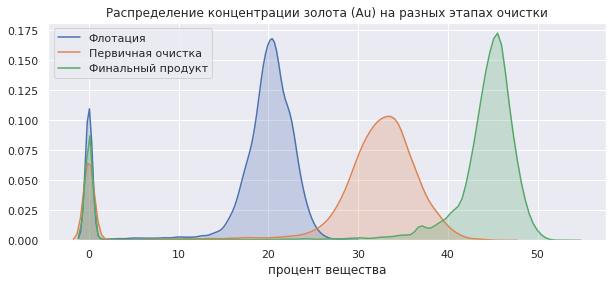

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

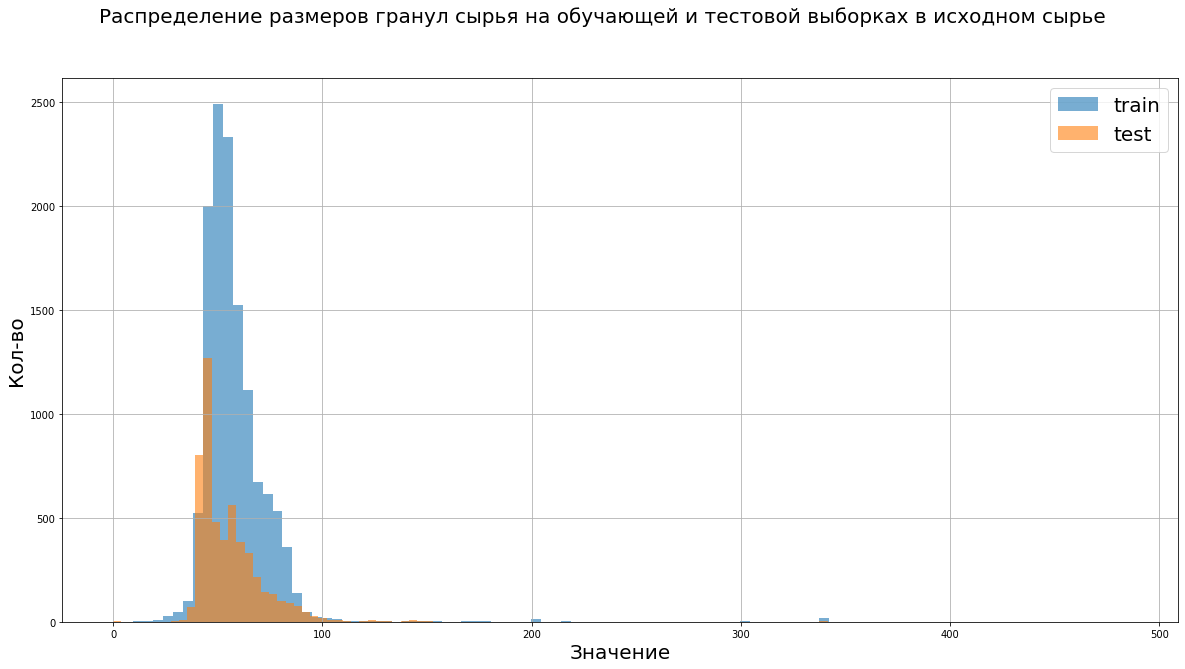

In [47]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Распределение размеров гранул сырья на обучающей и тестовой выборках в исходном сырье', fontsize = 20)
plt.xlabel('Значение', fontsize=20)
plt.ylabel('Кол-во', fontsize=20)


train_df['rougher.input.feed_size'].hist(bins=100, alpha=0.6, label='train')
test_df_1['rougher.input.feed_size'].hist(bins=100, alpha=0.6, label='test')

plt.legend(fontsize=20)
plt.show()

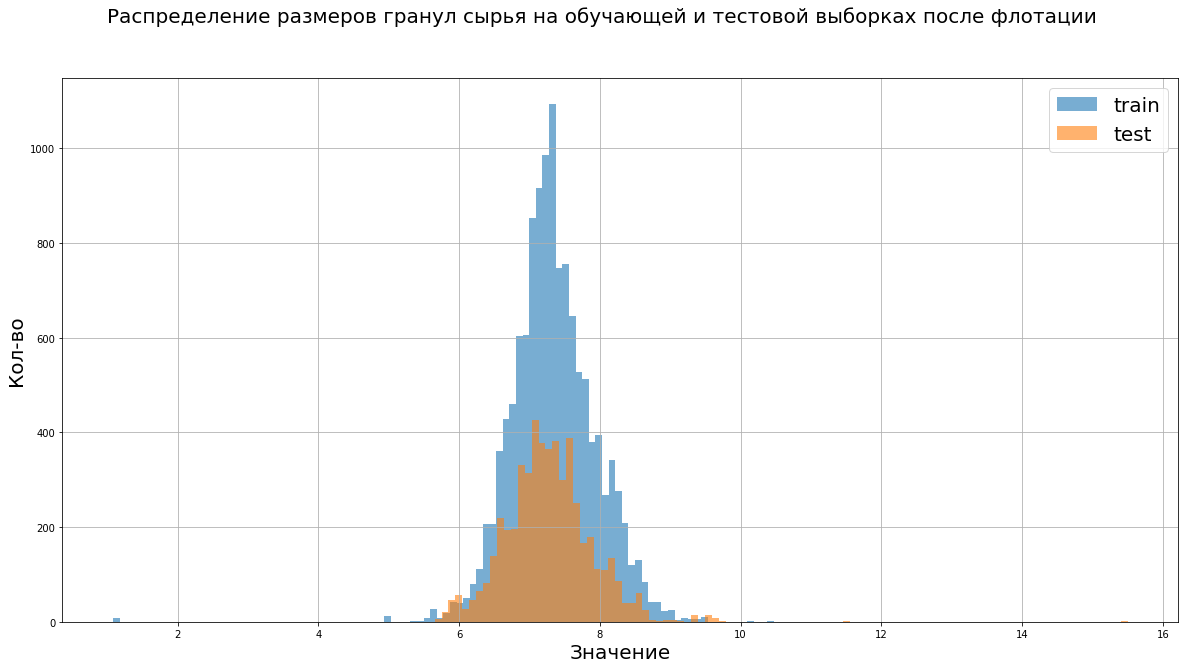

In [48]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Распределение размеров гранул сырья на обучающей и тестовой выборках после флотации', fontsize = 20)
plt.xlabel('Значение', fontsize=20)
plt.ylabel('Кол-во', fontsize=20)


train_df['primary_cleaner.input.feed_size'].hist(bins=100, alpha=0.6, label='train')
test_df_1['primary_cleaner.input.feed_size'].hist(bins=100, alpha=0.6, label='test')

plt.legend(fontsize=20)
plt.show()

###### Вывод:
- Распределение размеров гранул сырья на обучающей и тестовой выборках в исходном сырье имеет нормально распределение с незначительным левым смещением
- Размеры гранул перед первичной очисткой обладают нормальным распределением.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК,  верно, распределение для тестовой выборки немного отличается от такового для обучающей - первое сдвинуто немного в меньшую сторону. НО в целом размеры большинства частиц лежат в оптимальном интервале  40—100 мкм  («Флотация руды»: ООО "Техноаналитприбор":[сайт].URL:https://techade.ru/stati/flotatsiya-rudy) для обоих выборок. Поэтому, да, выборки подходят для оценки.

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [40]:
period = ['rougher.input.feed_ag', 
           'rougher.input.feed_pb', 
           'rougher.input.feed_au', 
           'rougher.output.concentrate_ag', 
           'rougher.output.concentrate_pb', 
           'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_pb', 
           'primary_cleaner.output.concentrate_au', 
           'final.output.concentrate_ag', 
           'final.output.concentrate_pb', 
           'final.output.concentrate_au'
         ]

In [41]:
sum_concentrations = full_df[period].copy()

In [42]:
sum_concentrations

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
0,6.100378,2.284912,6.486150,11.500771,7.101074,19.793808,8.547551,10.389648,34.174427,6.055403,9.889648,42.192020
1,6.161113,2.266033,6.478583,11.615865,7.278807,20.050975,8.558743,10.497069,34.118526,6.029369,9.968944,42.701629
2,6.116455,2.159622,6.362222,11.695753,7.216833,19.737170,8.603505,10.354494,33.969464,6.055926,10.213995,42.657501
3,6.043309,2.037807,6.118189,11.915047,7.175616,19.320810,7.221879,8.496563,28.260743,6.047977,9.977019,42.689819
4,6.060915,1.786875,5.663707,12.411054,7.240205,19.216101,9.089428,9.986786,33.044932,6.148599,10.142511,42.774141
...,...,...,...,...,...,...,...,...,...,...,...,...
19434,6.091855,4.617558,5.335862,11.124896,10.984003,18.603550,6.559174,12.445966,32.940215,3.224920,11.356233,46.713954
19435,6.121323,4.144989,4.838619,11.425983,10.888213,18.441436,6.612376,12.623947,32.925325,3.195978,11.349355,46.866780
19436,5.970515,4.020002,4.525061,8.523497,8.955135,15.111231,7.128896,12.633558,31.856742,3.109998,11.434366,46.795691
19437,6.048130,3.902537,4.362781,11.658799,10.655377,17.834772,7.490444,12.012378,30.770892,3.367241,11.625587,46.408188


In [43]:
sum_concentrations['final_output_sum'] = sum_concentrations['final.output.concentrate_ag'] + sum_concentrations['final.output.concentrate_pb'] + sum_concentrations['final.output.concentrate_au']

In [44]:
sum_concentrations['rougher_input_sum'] = sum_concentrations['rougher.input.feed_ag'] + sum_concentrations['rougher.input.feed_pb'] + sum_concentrations['rougher.input.feed_au']

In [45]:
sum_concentrations['rougher_output_sum'] = sum_concentrations['rougher.output.concentrate_ag'] + sum_concentrations['rougher.output.concentrate_pb'] + sum_concentrations['rougher.output.concentrate_au']

In [46]:
sum_concentrations.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,final_output_sum,rougher_input_sum,rougher_output_sum
0,6.100378,2.284912,6.486150,11.500771,7.101074,19.793808,8.547551,10.389648,34.174427,6.055403,9.889648,42.192020,58.137072,14.871440,38.395653
1,6.161113,2.266033,6.478583,11.615865,7.278807,20.050975,8.558743,10.497069,34.118526,6.029369,9.968944,42.701629,58.699942,14.905729,38.945647
2,6.116455,2.159622,6.362222,11.695753,7.216833,19.737170,8.603505,10.354494,33.969464,6.055926,10.213995,42.657501,58.927421,14.638299,38.649756
3,6.043309,2.037807,6.118189,11.915047,7.175616,19.320810,7.221879,8.496563,28.260743,6.047977,9.977019,42.689819,58.714815,14.199305,38.411473
4,6.060915,1.786875,5.663707,12.411054,7.240205,19.216101,9.089428,9.986786,33.044932,6.148599,10.142511,42.774141,59.065251,13.511497,38.867359


In [47]:
full_sum = [sum_concentrations['rougher_input_sum'], sum_concentrations['rougher_output_sum'], sum_concentrations['final_output_sum']]

[Text(0.5, 1.0, 'График распределения суммарных концентраций всех веществ на разных стадиях')]

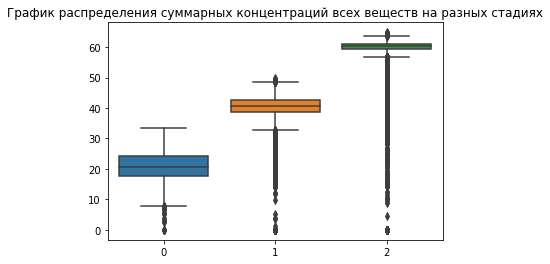

In [48]:
sns.boxplot(data=full_sum).set(title = 'График распределения суммарных концентраций всех веществ на разных стадиях')

###### Вывод
- На графике наблюдается слишком много данных выходящих за нижнюю границу статистической значимости. Вероятно это вызвано нулевыми значениями на всех этапах производства

In [49]:
# Удаляем из выборки  все данные, в которых сумма концентраций металлов на разных этапах равна 0.
sum_delete = sum_concentrations.loc[sum_concentrations['rougher_output_sum'] > 0].copy()
sum_delete = sum_delete.loc[sum_delete['final_output_sum'] > 0]
sum_delete = sum_delete.loc[sum_delete['rougher_input_sum'] > 0]

In [50]:
# По индексу из таблицы с чистыми данными удаляем строки с выбросами из тестовой, обучайющей и полной выборок
test_df_1.drop(test_df_1[~test_df_1.index.isin(sum_delete.index)].index, inplace=True)
train_df.drop(train_df[~train_df.index.isin(sum_delete.index)].index, inplace=True)
full_df.drop(full_df[~full_df.index.isin(sum_delete.index)].index, inplace=True)

## Модель

### Напишите функцию для вычисления итоговой sMAPE.

In [51]:
def smape(target_1, predictions):    
    a = abs(target_1 - predictions)
    b = (abs(target_1) + abs(predictions)) / 2
    errors = a / b
    return errors.sum()/ errors.shape[0] * 100

In [52]:
def ismape(smape_rougher, smape_final):
    result = 0.25*smape_rougher + 0.75*smape_final
    return result

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.

In [53]:
# Выделяем независимые и целевые признаки в обучающей выборке
X_train = train_df.drop(['rougher.output.recovery','final.output.recovery', 'date'],axis=1)
y_rougher_train = train_df['rougher.output.recovery']
y_final_train = train_df['final.output.recovery']

In [54]:
# Стандартизируем данные обучающих признаков
scaler = StandardScaler()
scaler.fit(X_train)
features_rougher = scaler.transform(X_train)

In [55]:
# Создаем кастомный скорер
custom_scorer = make_scorer(smape, greater_is_better=False)

In [56]:
lr_model = LinearRegression()
lr_rough = cross_val_score(lr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
lr_final = cross_val_score(lr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
print("Средняя sMAPE rougher на обучающей выборке модели LinearRegression:", abs(lr_rough.mean()))
print("Средняя sMAPE final на обучающей выборке модели LinearRegression:", abs(lr_final.mean()))

Средняя sMAPE rougher на обучающей выборке модели LinearRegression: 11.75783729702447
Средняя sMAPE final на обучающей выборке модели LinearRegression: 10.426557487475925


In [66]:
dtr_model = DecisionTreeRegressor()
dtr_rough = cross_val_score(dtr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
dtr_final = cross_val_score(dtr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
print("Средняя sMAPE rougher на обучающей выборке модели DecisionTreeRegressor:", abs(dtr_rough.mean()))
print("Средняя sMAPE final на обучающей выборке модели DecisionTreeRegressor:", abs(dtr_final.mean()))

Средняя sMAPE rougher на обучающей выборке модели DecisionTreeRegressor: 23.62617014436359
Средняя sMAPE final на обучающей выборке модели DecisionTreeRegressor: 16.096900000456856


In [67]:
for i in range(1,11):
    dtr_model = DecisionTreeRegressor(max_depth=i)
    dtr_rough = cross_val_score(dtr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
    dtr_final = cross_val_score(dtr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
    print(f'модель DecisionTreeRegressor max_depth = {i}:')
    print("Средняя sMAPE rougher на обучающей выборке", abs(dtr_rough.mean()))
    print("Средняя sMAPE final на обучающей выборке", abs(dtr_final.mean()))
    print()

модель DecisionTreeRegressor max_depth = 1:
Средняя sMAPE rougher на обучающей выборке 10.853818809062563
Средняя sMAPE final на обучающей выборке 8.887783910959893

модель DecisionTreeRegressor max_depth = 2:
Средняя sMAPE rougher на обучающей выборке 10.796861584582977
Средняя sMAPE final на обучающей выборке 9.933405349215501

модель DecisionTreeRegressor max_depth = 3:
Средняя sMAPE rougher на обучающей выборке 10.700582482797355
Средняя sMAPE final на обучающей выборке 10.19267189738955

модель DecisionTreeRegressor max_depth = 4:
Средняя sMAPE rougher на обучающей выборке 11.017432057022969
Средняя sMAPE final на обучающей выборке 9.915112146064725

модель DecisionTreeRegressor max_depth = 5:
Средняя sMAPE rougher на обучающей выборке 11.353452325242364
Средняя sMAPE final на обучающей выборке 10.10259251168258

модель DecisionTreeRegressor max_depth = 6:
Средняя sMAPE rougher на обучающей выборке 16.11994764297483
Средняя sMAPE final на обучающей выборке 10.640080228626484

моде

In [68]:
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_rough = cross_val_score(rfr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
rfr_final = cross_val_score(rfr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
print("Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor:", abs(rfr_rough.mean()))
print("Средняя sMAPE final на обучающей выборке модели RandomForestRegressor:", abs(rfr_final.mean()))

Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 13.065800339475231
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 10.059917485200021


In [69]:
for i in range(1,11):
    rfr_model = RandomForestRegressor(n_estimators=100, max_depth=i, random_state=12345)
    rfr_rough = cross_val_score(rfr_model, X_train, y_rougher_train, scoring=custom_scorer, cv=5)
    rfr_final = cross_val_score(rfr_model, X_train, y_final_train, scoring=custom_scorer, cv=5)
    print(f'модель RandomForestRegressor max_depth = {i}:')
    print("Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor:", abs(rfr_rough.mean()))
    print("Средняя sMAPE final на обучающей выборке модели RandomForestRegressor:", abs(rfr_final.mean()))
    print()

модель RandomForestRegressor max_depth = 1:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 10.861114237211549
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 8.813177073968237

модель RandomForestRegressor max_depth = 2:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 10.462561615758624
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.231119358565364

модель RandomForestRegressor max_depth = 3:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 10.189350630248777
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.437420711262693

модель RandomForestRegressor max_depth = 4:
Средняя sMAPE rougher на обучающей выборке модели RandomForestRegressor: 10.155487027983787
Средняя sMAPE final на обучающей выборке модели RandomForestRegressor: 9.237445562084885

модель RandomForestRegressor max_depth = 5:
Средняя sMAPE rougher на обучающей выборке модели Ra

###### Вывод: Наилучший результат на обучающей выборке показала модель RandomForestRegressor 

In [57]:
X_test = test_df_1.drop(['rougher.output.recovery','final.output.recovery', 'date'],axis=1)

In [68]:
model = RandomForestRegressor(max_depth=5, random_state=12345, n_estimators=30)
# обучаем модель для предсказания rougher.output.recovery
model.fit(X_train, y_rougher_train)
# предсказываем показатель для тестового rougher.output.recovery
rougher_predict = model.predict(X_test)
print('среднее значение тестового rougher.output.recovery = ', rougher_predict.mean())

среднее значение тестового rougher.output.recovery =  83.70908687803255


In [69]:
model = RandomForestRegressor(max_depth=3, random_state=12345, n_estimators=50)
# обучаем модель для предсказания final.output.recovery
model.fit(X_train, y_final_train)
# предсказываем показатель для тестового final.output.recovery
final_predict = model.predict(X_test)
print('среднее значение тестового final.output.recovery = ', final_predict.mean())

среднее значение тестового final.output.recovery =  68.46517616195892


In [70]:
# Рассчитываем финальное значение sMAPE для предсказаний.
test_rougher_predicted = rougher_predict.copy() # ДОБВИЛ COPY()
test_final_predicted = final_predict.copy()
test_rougher_target = test_df_1['rougher.output.recovery']
test_final_target = test_df_1['final.output.recovery']
print('Средняя sMAPE rougher на обучающей выборке:', smape(test_rougher_target, test_rougher_predicted).mean())
print('Средняя sMAPE final на обучающей выборке:',smape(test_final_target, test_final_predicted).mean())
print('финальное значение sMAPE',ismape(smape(test_rougher_target, test_rougher_predicted), smape(test_final_target, test_final_predicted)))

Средняя sMAPE rougher на обучающей выборке: 9.847826414407564
Средняя sMAPE final на обучающей выборке: 9.615709455825327
финальное значение sMAPE 9.673738695470886


In [71]:
test_rougher_target

0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5285    95.172585
5286    94.575036
5287    93.018138
5288    92.599042
5289    91.177695
Name: rougher.output.recovery, Length: 4643, dtype: float64

In [58]:
# Рассчитываем финальное значение sMAPE для константной модели
const_rougher = pd.Series(train_df['rougher.output.recovery'].median(), range(len(train_df)))
const_final = pd.Series(train_df['final.output.recovery'].median(), range(len(train_df)))
print('Средняя sMAPE rougher на обучающей выборке:', smape(y_rougher_train, const_rougher).mean())
print('Средняя sMAPE final на обучающей выборке:',smape(y_final_train, const_final).mean())
print('финальное значение sMAPE',ismape(smape(y_rougher_train, const_rougher), smape(y_final_train, const_final)))

Средняя sMAPE rougher на обучающей выборке: 7.170628073838115
Средняя sMAPE final на обучающей выборке: 6.4750480894064015
финальное значение sMAPE 6.648943085514331


###### Вывод:
- sMAPE для предсказаний на тестовой модели получилось больше,  чем sMAPE рассчитанное на случайной модели. Дальнейшие выводы и статистические расчеты будут требовать дополнительный исследований, измерений и проработок.